In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [227]:
mat = pd.read_csv("student-mat.csv")
por = pd.read_csv("student-por.csv")

data = pd.concat([mat, por])

### 한글폰트설정

In [228]:
plt.rc('font', family='NanumGothic')

# 지역별 알콜소비량

### 지역별 알콜소비

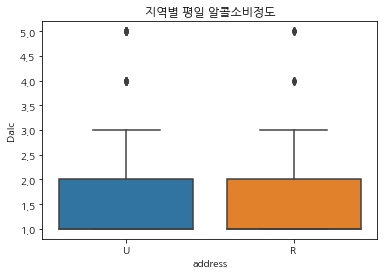

         count      mean       std  min  25%  50%  75%  max
address                                                    
R        285.0  1.589474  0.947510  1.0  1.0  1.0  2.0  5.0
U        759.0  1.458498  0.895932  1.0  1.0  1.0  2.0  5.0





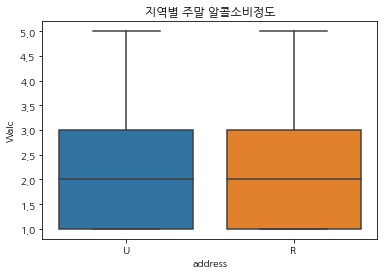

         count      mean       std  min  25%  50%  75%  max
address                                                    
R        285.0  2.375439  1.301175  1.0  1.0  2.0  3.0  5.0
U        759.0  2.250329  1.278211  1.0  1.0  2.0  3.0  5.0


In [229]:
sns.boxplot(data=data, x="address", y="Dalc")
plt.title("지역별 평일 알콜소비정도")
plt.show()
print(data.groupby("address")["Dalc"].describe())
print()
print()
print()
sns.boxplot(data=data, x="address", y="Walc")
plt.title("지역별 주말 알콜소비정도")
plt.show()
print(data.groupby("address")["Walc"].describe())

### 지역별 평균 알콜소비량

  address      Dalc      Walc
0       R  1.589474  2.375439
1       U  1.458498  2.250329


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


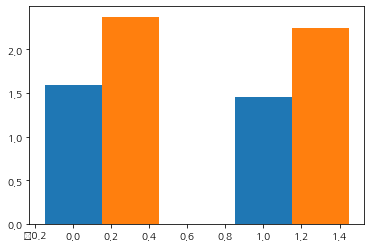

In [230]:
address = data.groupby("address")[["Dalc", "Walc"]].mean().reset_index()
plt.bar(x=address.index, height=address["Dalc"].values, width=0.3)
plt.bar(x=address.index+0.3, height=address["Walc"].values, width=0.3)
print(address)

## 결론
### 지역내의 알콜 소비정도는 비슷하나 지역별로는 시골지역 학생들의 알콜소비량이 더 많고 주말에는 특히 더 많다

# 학교별 알콜소비량


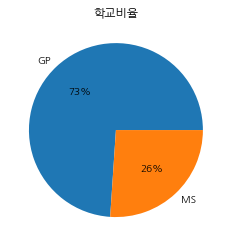

In [231]:
data["school"].value_counts()
x = data["school"].value_counts().index
y = data["school"].value_counts().values
plt.pie(y, labels=x, autopct="%d%%")
plt.title("학교비율")
plt.show()

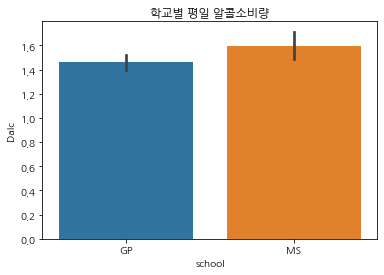

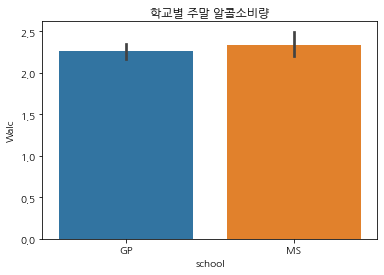

In [232]:
sns.barplot(data=data, x="school", y="Dalc")
plt.title("학교별 평일 알콜소비량")
plt.show()

sns.barplot(data=data, x="school", y="Walc")
plt.title("학교별 주말 알콜소비량")
plt.show()

## 결론
### 학생수는 gp의 학생수가 절대적으로 더 많지만 알콜소비량은 ms의 학생들이 더 많다

## 통학시간과 학교별 통학시간 통계

1    623
2    320
3     77
4     24
Name: traveltime, dtype: int64


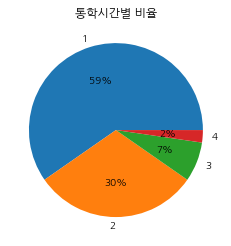

In [233]:
print(data["traveltime"].value_counts())
plt.pie(data["traveltime"].value_counts().values, labels=data["traveltime"].value_counts().index, autopct="%d%%")
plt.title("통학시간별 비율")
plt.show()

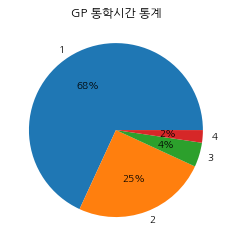

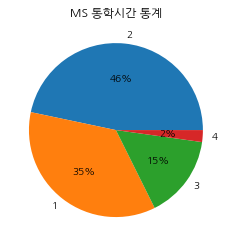

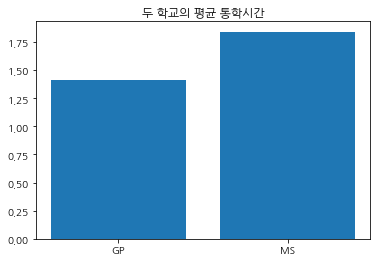

In [244]:
school_traveltime = data.groupby("school")["traveltime"].value_counts()
plt.pie(school_traveltime["GP"].values, labels=school_traveltime["GP"].index, autopct="%d%%")
plt.title("GP 통학시간 통계")
plt.show()

plt.pie(school_traveltime["MS"].values, labels=school_traveltime["MS"].index, autopct="%d%%")
plt.title("MS 통학시간 통계")
plt.show()

average = data.groupby("school")["traveltime"].mean()
average

plt.bar(x=[0, 1], height=average.values)
plt.xticks([0, 1], average.index)
plt.title("두 학교의 평균 통학시간")
plt.show()

## 결론
### MS가 GP보다 통학시간이 더 긴 아이들이 많음

## 학교별 도시와 시골지역 아이들 비교

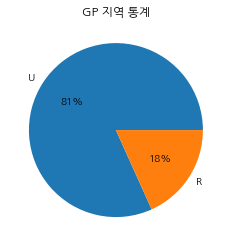

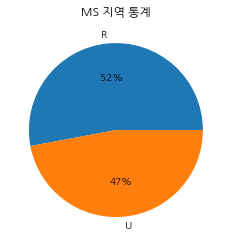

school  address
GP      U          631
        R          141
MS      R          144
        U          128
Name: address, dtype: int64


In [245]:
temp_school = data.groupby("school")["address"].value_counts()
plt.pie(temp_school["GP"].values, labels=temp_school["GP"].index, autopct="%d%%")
plt.title("GP 지역 통계")
plt.show()

plt.pie(temp_school["MS"].values, labels=temp_school["MS"].index, autopct="%d%%")
plt.title("MS 지역 통계")
plt.show()
print(temp_school)

### ms가 gp보다 더 시골지역 아이들이 많음

## 공부시간과 알콜 소비량의 관계분석

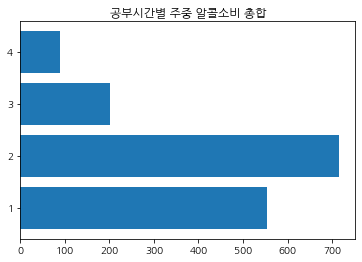

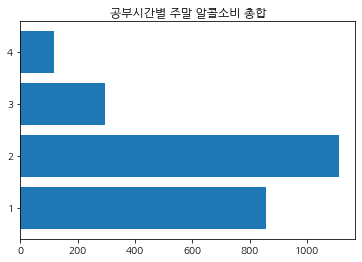

In [236]:
data.groupby("studytime")["Dalc"].sum()
y = np.arange(4)
plt.barh(y, data.groupby("studytime")["Dalc"].sum().values)
plt.yticks(y, data.groupby("studytime")["Dalc"].sum().index)
plt.title("공부시간별 주중 알콜소비 총합")
plt.show()

data.groupby("studytime")["Walc"].sum()
y = np.arange(4)
plt.barh(y, data.groupby("studytime")["Walc"].sum().values)
plt.yticks(y, data.groupby("studytime")["Walc"].sum().index)
plt.title("공부시간별 주말 알콜소비 총합")
plt.show()

### 지역별 공부량 비교

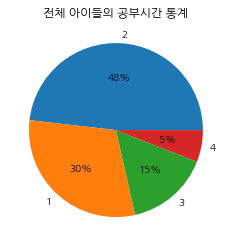

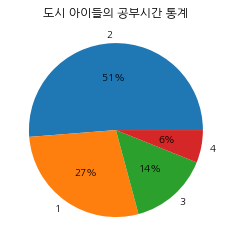

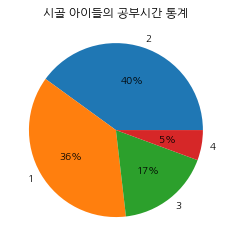

Int64Index([2, 1, 3, 4], dtype='int64', name='studytime')

In [237]:
data["studytime"].value_counts()
plt.pie(data["studytime"].value_counts().values, labels=data["studytime"].value_counts().index, autopct="%d%%")
plt.title("전체 아이들의 공부시간 통계")
plt.show()

data.groupby("address")["studytime"].value_counts()
plt.pie(data.groupby("address")["studytime"].value_counts()["U"].values, labels=data.groupby("address")["studytime"].value_counts()["U"].index, autopct="%d%%")
plt.title("도시 아이들의 공부시간 통계")
plt.show()

plt.pie(data.groupby("address")["studytime"].value_counts()["R"].values, labels=data.groupby("address")["studytime"].value_counts()["R"].index, autopct="%d%%")
plt.title("시골 아이들의 공부시간 통계")
plt.show()




### 시골아이들이 공부를 더 극단적으로 함

## 정리
### 여기까지 알아낸 것
1. 도시 아이들보다 시골아이들이 술을 더(0.1p) 많이 먹는다(유의미한 차이는 아닌 것 같다)
2. 재학생수는 GP가 73% MS가 26%로 GP를 다니는 학생수가 3배 정도 더 많다
3. GP학생들은 MP학생들보다 평균적으로 통학시간이 더 길다.(0.4p정도)
4. GP학교의 도시와 시골학생의 비율은 81 : 18
5. MS학교의 도시와 시골학생의 비율은 47 : 52
6. GP학교에는 도시아이들이 압도적으로 많이다니지만(약 3.8배) MS학교에는 도시와 시골아이들이 비슷하게 다닌다
7. 공부시간에 따라 알콜소비량에 차이가 분명히 존재한다.
8. 도시아이들의 공부시간은 전체아이들의 공부시간에 근접하다(차이 3%미만)
9. 시골아이들은 도시아이들에 비해 공부를 약간 안하는 아이들보다 거의 안하는 아이들이 훨씬 더 많다

## 주중 알콜소비량과 주말 알콜소비량의 관계

ValueError: cannot reindex from a duplicate axis

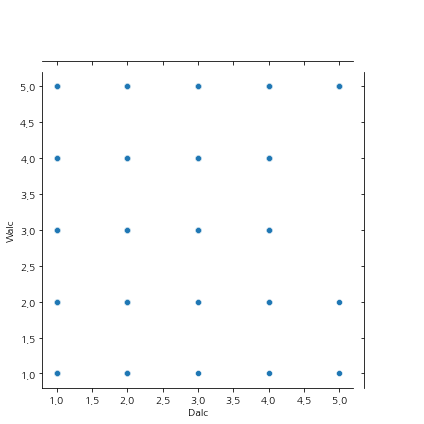

In [255]:
x = data[["school", "address", "studytime", "traveltime"]].copy()
x

,school,address,studytime,traveltime
0,GP,U,2,2
1,GP,U,2,1
2,GP,U,2,1
3,GP,U,3,1
4,GP,U,2,1
...,...,...,...,...
644,MS,R,3,1
645,MS,U,2,1
646,MS,U,2,2
647,MS,U,1,2
